Using OneClass-SVM Model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [5]:
train_df = pd.read_csv("../data/train1.csv", parse_dates=["date"])
train_df = train_df.sort_values("date").reset_index(drop=True)

test_df = pd.read_csv("../data/test1.csv", parse_dates=["date"])
test_df = test_df.sort_values("date").reset_index(drop=True)

In [6]:
ocsvm_model = OneClassSVM(nu=0.134, kernel='rbf', gamma='scale')
ocsvm_model.fit(train_df[["hours"]])


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"nu nu: float, default=0.5An upper bound on the fraction of trainingerrors and a lower bound of the fraction of supportvectors. Should be in the interval (0, 1]. By default 0.5will be taken.",0.134
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


         date  hours     score  anomaly
0  2026-07-01    2.5 -0.000163     True
1  2026-07-02    2.6  0.000547    False
2  2026-07-03    2.4 -0.000163     True
3  2026-07-04    2.7 -0.000095     True
4  2026-07-05    2.5 -0.000163     True
5  2026-07-06    1.2 -4.647562     True
6  2026-07-07    2.6  0.000547    False
7  2026-07-08    3.3 -4.647558     True
8  2026-07-09    2.5 -0.000163     True
9  2026-07-10    2.6  0.000547    False
10 2026-07-11    2.4 -0.000163     True
11 2026-07-12    2.7 -0.000095     True
12 2026-07-13    2.5 -0.000163     True
13 2026-07-14    2.6  0.000547    False
14 2026-07-15    2.5 -0.000163     True
15 2026-07-16    0.9 -4.647562     True
16 2026-07-17    2.6  0.000547    False
17 2026-07-18    2.5 -0.000163     True
18 2026-07-19    2.7 -0.000095     True
19 2026-07-20    2.6  0.000547    False
20 2026-07-21    2.4 -0.000163     True
21 2026-07-22    3.4 -4.647562     True
22 2026-07-23    2.5 -0.000163     True
23 2026-07-24    2.6  0.000547    False


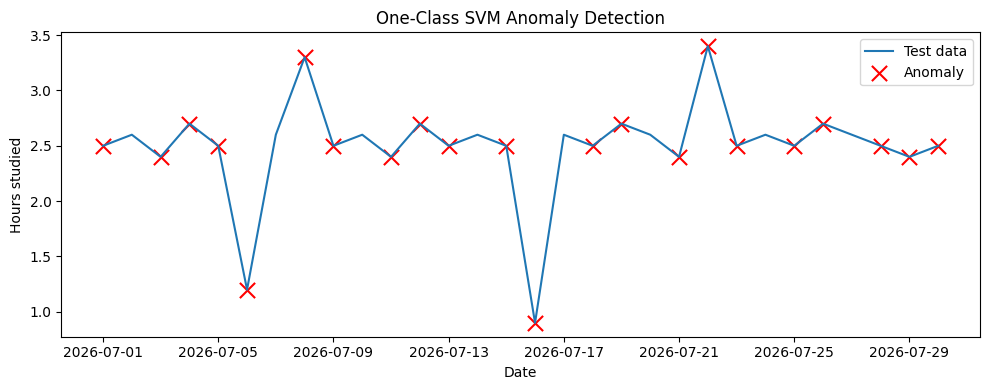

In [7]:
test_df["anomaly"] = ocsvm_model.predict(test_df[["hours"]]) == -1
test_df["score"] = ocsvm_model.decision_function(test_df[["hours"]])

print(test_df[["date", "hours", "score", "anomaly"]])

plt.figure(figsize=(10, 4))
plt.plot(test_df["date"], test_df["hours"], label="Test data")
plt.scatter(
    test_df.loc[test_df["anomaly"], "date"],
    test_df.loc[test_df["anomaly"], "hours"],
    s=120, marker="x", color="red", label="Anomaly"
)
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("One-Class SVM Anomaly Detection")
plt.legend()
plt.tight_layout()
plt.show()



### Takeaways
1. With the same contamination and nu, OC-SVM is far more aggresive.
2. Even with small deviations, it has strongly negative scores. Extreme values have large negative scores (~-4.64) → strongly anomalous.
3. Isolation Forest is more conservative and flagged only the most extreme points. OC-SVM flagged even those on borderline.